In [2]:
import gdown
!rm -r /content/sample_data # i hate a lot this folder
path = 'https://drive.google.com/file/d/1zyQhaAfcAjbELA78hzDPFl89NS2il-iR/view?usp=share_link'
link = path.split('/')
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id={link[-2]}",
    'data.rar'
)

rm: cannot remove '/content/sample_data': No such file or directory


Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1zyQhaAfcAjbELA78hzDPFl89NS2il-iR
To: /content/data.rar
100%|██████████| 8.10G/8.10G [01:06<00:00, 121MB/s]


'data.rar'

In [3]:
%%capture
!unrar x '/content/data.rar' '/content'

In [4]:
path = 'https://drive.google.com/file/d/1wwuQp2vn8-_hUkdpsI-fLr5yR-L6pqzF/view?usp=sharing'
link = path.split('/')
gdown.download(
    f"https://drive.google.com/uc?export=download&confirm=pbef&id={link[-2]}",
    'data_June.zip'
)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1wwuQp2vn8-_hUkdpsI-fLr5yR-L6pqzF
To: /content/data_June.zip
100%|██████████| 2.62G/2.62G [00:12<00:00, 201MB/s]


'data_June.zip'

In [5]:
%%capture
!unzip data_June.zip

In [6]:
import pandas as pd
# go to https://www.drivendata.org/competitions/99/biomass-estimation/data/ to get the link train_agbm_metadata.csv
# train_agbm_metadata
url2 = 'https://raw.githubusercontent.com/sandroormeno/TheBioMassters/main/features_metadata.csv'
df = pd.read_csv(url2)
df.head()

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif


In [7]:
chip_ids = df['chip_id']
len(chip_ids)

252426

In [8]:
chip_ids = df['chip_id'].unique()
len(chip_ids)

11462

In [9]:
train_ = df.loc[:, 'split'] == 'train'
train = df.loc[train_]
len(train)

189078

In [10]:
train_chip_ids = train['chip_id'].unique()
len(train_chip_ids)

8689

In [11]:
train.head()

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif


In [12]:
train_chip_ids[1]

'000aa810'

In [ ]:
test_ = df.loc[:, 'split'] == 'test'
test = df.loc[test_]
len(test)

63348

In [ ]:
test_chip_ids = test['chip_id'].unique()
len(test_chip_ids)

2773

In [ ]:
train_chip_ids[:10]

array(['0003d2eb', '000aa810', '000d7e33', '00184691', '001b0634',
       '001eb75a', '0029317e', '002fb84c', '00301627', '003a2b5b'],
      dtype=object)

In [22]:
from pathlib import Path
import os
path_set = ['data/train/September/s1/','data/train/September/s2/', 'data/train/September/s3/']
path_agost = ['data/train/August/s1/','data/train/August/s2/', 'data/train/August/s3/']
path_jul = ['data/train/July/s1/','data/train/July/s2/', 'data/train/July/s3/']
path_jun = ['data/train/June/s1/','data/train/June/s2/', 'data/train/June/s3/']
satellite = ['S1', 'S2', 'S3']
id_month = ['00', '09', '10', '11']
month = ['September', 'June',  'July', 'August']
contador_s1 = 0
contador_s2 = 0
filenames, labels, ids  = [],[],[]
for i in train_chip_ids:
    # make file name for S2 for example : 0003d2eb_S1_01.tif
    names = {'S1': {}, 'S2': {}, 'S3': {} }
# esto es para buscar S1  ------------------------------------ September
    name= f'{i}_{satellite[0]}_{id_month[0]}.png'
    ful_path = Path(f'{path_set[0]}{name}')
    if (ful_path).exists():
        names[satellite[0]][month[0]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]][month[0]] = None 
# esto es para buscar S2 ------------------------------------ September
    name= f'{i}_{satellite[1]}_{id_month[0]}.png'
    ful_path_ = Path(f'{path_set[1]}{name}')
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[1]][month[0]] = str(ful_path_)
    else:
        names[satellite[1]][month[0]] = None 
# esto es para buscar S2 segunda parte (s3) ----------------- September
    name= f'{i}_{satellite[1]}_{id_month[0]}.png' # s2
    ful_path_ = Path(f'{path_set[2]}{name}') # busca en September/s3/
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[2]][month[0]] = str(ful_path_)
    else:
        names[satellite[2]][month[0]] = None 
# esto es para buscar S1  ------------------------------------ August
    name= f'{i}_{satellite[0]}_{id_month[3]}.png'
    ful_path = Path(f'{path_agost[0]}{name}')
    if (ful_path).exists():
        names[satellite[0]][month[3]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]][month[3]] = None 
# esto es para buscar S2 ------------------------------------ August
    name= f'{i}_{satellite[1]}_{id_month[3]}.png'
    ful_path_ = Path(f'{path_agost[1]}{name}')
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[1]][month[3]] = str(ful_path_)
    else:
        names[satellite[1]][month[3]] = None 
# esto es para buscar S2 segunda parte (s3) ----------------- August
    name= f'{i}_{satellite[1]}_{id_month[3]}.png' # s2
    ful_path_ = Path(f'{path_agost[2]}{name}') # busca en September/s3/
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[2]][month[3]] = str(ful_path_)
    else:
        names[satellite[2]][month[3]] = None

# esto es para buscar S1  ------------------------------------ July
    name= f'{i}_{satellite[0]}_{id_month[2]}.png'
    ful_path = Path(f'{path_jul[0]}{name}')
    if (ful_path).exists():
        names[satellite[0]][month[2]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]][month[2]] = None 
# esto es para buscar S2 ------------------------------------ July
    name= f'{i}_{satellite[1]}_{id_month[2]}.png'
    ful_path_ = Path(f'{path_jul[1]}{name}')
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[1]][month[2]] = str(ful_path_)
    else:
        names[satellite[1]][month[2]] = None 
# esto es para buscar S2 segunda parte (s3) ----------------- July
    name= f'{i}_{satellite[1]}_{id_month[2]}.png' # s2
    ful_path_ = Path(f'{path_jul[2]}{name}') # busca en September/s3/
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[2]][month[2]] = str(ful_path_)
    else:
        names[satellite[2]][month[2]] = None


# esto es para buscar S1  ------------------------------------ June
    name= f'{i}_{satellite[0]}_{id_month[1]}.png'
    ful_path = Path(f'{path_jun[0]}{name}')
    if (ful_path).exists():
        names[satellite[0]][month[1]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]][month[1]] = None 
# esto es para buscar S2 ------------------------------------ June
    name= f'{i}_{satellite[1]}_{id_month[1]}.png'
    ful_path_ = Path(f'{path_jun[1]}{name}')
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[1]][month[1]] = str(ful_path_)
    else:
        names[satellite[1]][month[1]] = None 
# esto es para buscar S2 segunda parte (s3) ----------------- June
    name= f'{i}_{satellite[1]}_{id_month[1]}.png' # s2
    ful_path_ = Path(f'{path_jun[2]}{name}') # busca en September/s3/
    if (ful_path_).exists():
        contador_s2 += 1
        names[satellite[2]][month[1]] = str(ful_path_)
    else:
        names[satellite[2]][month[1]] = None


# añado a la lista ----------------------------------------- all append
    filenames.append(names)
    labels.append(f'data/train_agbm/{i}_agbm.npz')
    ids.append(i)
mi_pd = pd.DataFrame({'filename': filenames, 'label': labels}, index=ids)

In [13]:
from pathlib import Path
import os
path = ['data/train/June/s1/','data/train/June/s2/', 'data/train/June/s3/']
satellite = ['S1', 'S2', 'S3']
contador_s1 = 0
contador_s2 = 0
filenames, labels, ids  = [],[],[]
for i in train_chip_ids:
    # make file name for S2 for example : 0003d2eb_S1_01.tif
    names = {'S1': {}, 'S2': {}, 'S3': {} }
    #for sensor in satellite:
    #for p in path:
# esto es para buscar S1 
    name= f'{i}_{satellite[0]}_00.png'
    ful_path = Path(f'{path[0]}{name}')
    #ful_path_ = os.path.join(path_,name_s2)
    #ful_path = f'{path}{name_s2}'
    #lolo = os.path.relpath(ful_path, '/')
    if (ful_path).exists():
        #x = str(ful_path).replace('\\', "/")
        #print(x)
        names[satellite[0]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]] = None 
    #break
# esto es para buscar S2
    name= f'{i}_{satellite[1]}_00.png'
    ful_path_ = Path(f'{path[1]}{name}')
    if (ful_path_).exists():
        #x = str(ful_path).replace('\\', "/")
        #print(x)
        contador_s2 += 1
        names[satellite[1]] = str(ful_path_)
    else:
        names[satellite[1]] = None 
# esto es para buscar S2 segunda parte (s3)
    name= f'{i}_{satellite[1]}_00.png' # s2
    ful_path_ = Path(f'{path[2]}{name}') # busca en September/s3/
    if (ful_path_).exists():
        #x = str(ful_path).replace('\\', "/")
        #print(x)
        contador_s2 += 1
        names[satellite[2]] = str(ful_path_)
    else:
        names[satellite[2]] = None 
# añado a la lista
    filenames.append(names)
    labels.append(f'data/train_agbm/{i}_agbm.npz')
    ids.append(i)
mi_pd = pd.DataFrame({'filename': filenames, 'label': labels}, index=ids)
#print(contador_s1, contador_s2)
#len(filenames), len(labels), len(ids)

In [ ]:
from pathlib import Path
import os
path = ['data/train/September/s1/','data/train/September/s2/']
satellite = ['S1', 'S2']
contador_s1 = 0
contador_s2 = 0
filenames, labels, ids  = [],[],[]
for i in train_chip_ids:
    # make file name for S2 for example : 0003d2eb_S1_01.tif
    names = {'S1': {}, 'S2': {}}
    #for sensor in satellite:
    #for p in path:
    name= f'{i}_{satellite[0]}_00.png'
    ful_path = Path(f'{path[0]}{name}')
    #ful_path_ = os.path.join(path_,name_s2)
    #ful_path = f'{path}{name_s2}'
    #lolo = os.path.relpath(ful_path, '/')
    if (ful_path).exists():
        #x = str(ful_path).replace('\\', "/")
        #print(x)
        names[satellite[0]] = str(ful_path)
        contador_s1 += 1
    else:
        names[satellite[0]] = None 
    #break
    name= f'{i}_{satellite[1]}_00.png'
    ful_path_ = Path(f'{path[1]}{name}')
    if (ful_path_).exists():
        #x = str(ful_path).replace('\\', "/")
        #print(x)
        contador_s2 += 1
        names[satellite[1]] = str(ful_path_)
    else:
        names[satellite[1]] = None 
    filenames.append(names)
    labels.append(f'data/train_agbm/{i}_agbm.npz')
    ids.append(i)
mi_pd = pd.DataFrame({'filename': filenames, 'label': labels}, index=ids)
#print(contador_s1, contador_s2)
#len(filenames), len(labels), len(ids)

In [23]:
len(mi_pd)

8689

In [24]:
mi_pd.head()

,filename,label
0003d2eb,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/0003d2eb_agbm.npz
000aa810,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/000aa810_agbm.npz
000d7e33,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/000d7e33_agbm.npz
00184691,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/00184691_agbm.npz
001b0634,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/001b0634_agbm.npz


In [28]:
mi_pd['filename'][45]

{'S1': {'September': 'data/train/September/s1/01417893_S1_00.png',
  'August': 'data/train/August/s1/01417893_S1_11.png',
  'July': 'data/train/July/s1/01417893_S1_10.png',
  'June': 'data/train/June/s1/01417893_S1_09.png'},
 'S2': {'September': None,
  'August': 'data/train/August/s2/01417893_S2_11.png',
  'July': 'data/train/July/s2/01417893_S2_10.png',
  'June': 'data/train/June/s2/01417893_S2_09.png'},
 'S3': {'September': None,
  'August': 'data/train/August/s3/01417893_S2_11.png',
  'July': 'data/train/July/s3/01417893_S2_10.png',
  'June': 'data/train/June/s3/01417893_S2_09.png'}}

In [29]:
mi_pd.to_json('train.json')

In [30]:
train_df = pd.read_json('train.json')
train_df.head()

,filename,label
0003d2eb,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/0003d2eb_agbm.npz
000aa810,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/000aa810_agbm.npz
000d7e33,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/000d7e33_agbm.npz
00184691,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/00184691_agbm.npz
001b0634,{'S1': {'September': 'data/train/September/s1/...,data/train_agbm/001b0634_agbm.npz


In [ ]:
import random
index = random.randint(0, len(train_df))
train_df['filename'][index], train_df['label'][index]

({'S1': 'data/train/September/s1/3f8f6ebe_S1_00.png', 'S2': None, 'S3': None},
 'data/train_agbm/3f8f6ebe_agbm.npz')

In [ ]:
sample = train_df.iloc[94]
s1 = sample.filename['S1']
s2 = sample.filename['S2']
label = sample.label
s1, s2, label

('data/train/September/s1/02a603ee_S1_00.png',
 'data/train/September/s2/02a603ee_S2_00.png',
 'data/train_agbm/02a603ee_agbm.npz')

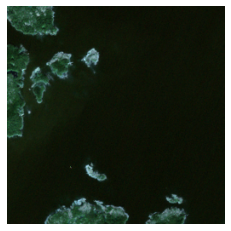

In [ ]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread(s2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

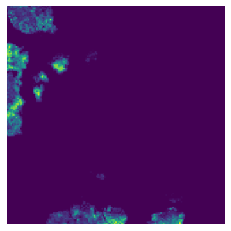

In [ ]:
import numpy as np
segmentation_npz = np.load(label)
segmentation_map = segmentation_npz['arr_0']
plt.imshow(segmentation_map)
plt.axis('off')
plt.show()

data/train/September/s2/c2c36074_S2_00.png


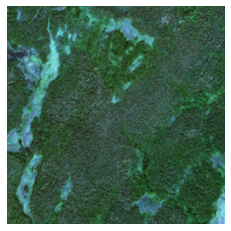

data/train/September/s1/c2c36074_S1_00.png


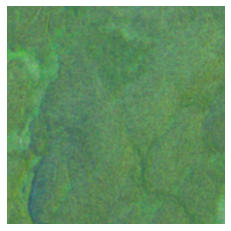

In [ ]:
index = random.randint(0, len(train_df))
sample = train_df.iloc[index]
s1 = sample.filename['S1']
s2 = sample.filename['S2']
label = sample.label
print(s2)
image = cv2.imread(s2)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()
print(s1)
image = cv2.imread(s1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()
